In [39]:
# Import library yang kalian butuhkan
import os
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, classification_report
from skimage.feature import graycomatrix, graycoprops
from scipy.stats import entropy
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay)
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

## Data Loading

Buat struktur folder dataset sebagai berikut:
```
.
└──dataset
    ├── label1
	├── image1.jpg
	├── image2.jpg
	└── image3.jpg
    ├── label2
    └── label3
    └── dst...
```

In [7]:
data = []
labels = []
file_name = []
for sub_folder in os.listdir("dataset\\"):
    sub_folder_files = os.listdir(os.path.join("dataset\\", sub_folder))
    for i, filename in enumerate(sub_folder_files):
        img_path = os.path.join("dataset\\", sub_folder, filename)
        img = cv.imread(img_path)
        
        data.append(img)
        labels.append(sub_folder)
        name = os.path.splitext(filename)[0]
        file_name.append(filename)
        
# data = np.array(data)
# labels = np.array(labels)


## Data Augmentation

### Define Augmentation Function


In [ ]:
# melakukan augmentasi data
data_augmented = []
labels_augmented = []
paths_augmented = []
file_name_augmented = []
for i in range(len(data)):
	pass

In [ ]:
print("Data sebelum augmentasi: ", len(data))
print("Data setelah augmentasi: ", len(data_augmented))

## Data Preparation

### Define Preprocessing Function


In [8]:
def resize(img, target_height, target_width):
    height, width = img.shape
    resized_img = np.zeros((target_height, target_width), dtype=np.uint8)
    
    scale_x = width / target_width
    scale_y = height / target_height

    for i in range(target_height):
        for j in range(target_width):
            orig_x = min(int(j * scale_x), width - 1)
            orig_y = min(int(i * scale_y), height - 1)
            resized_img[i, j] = img[orig_y, orig_x]

    return resized_img

def percobaan_1(img, target_height, target_width):
    gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    resized_img = resize(gray_img, target_height, target_width)
    return resized_img


### Preprocessing

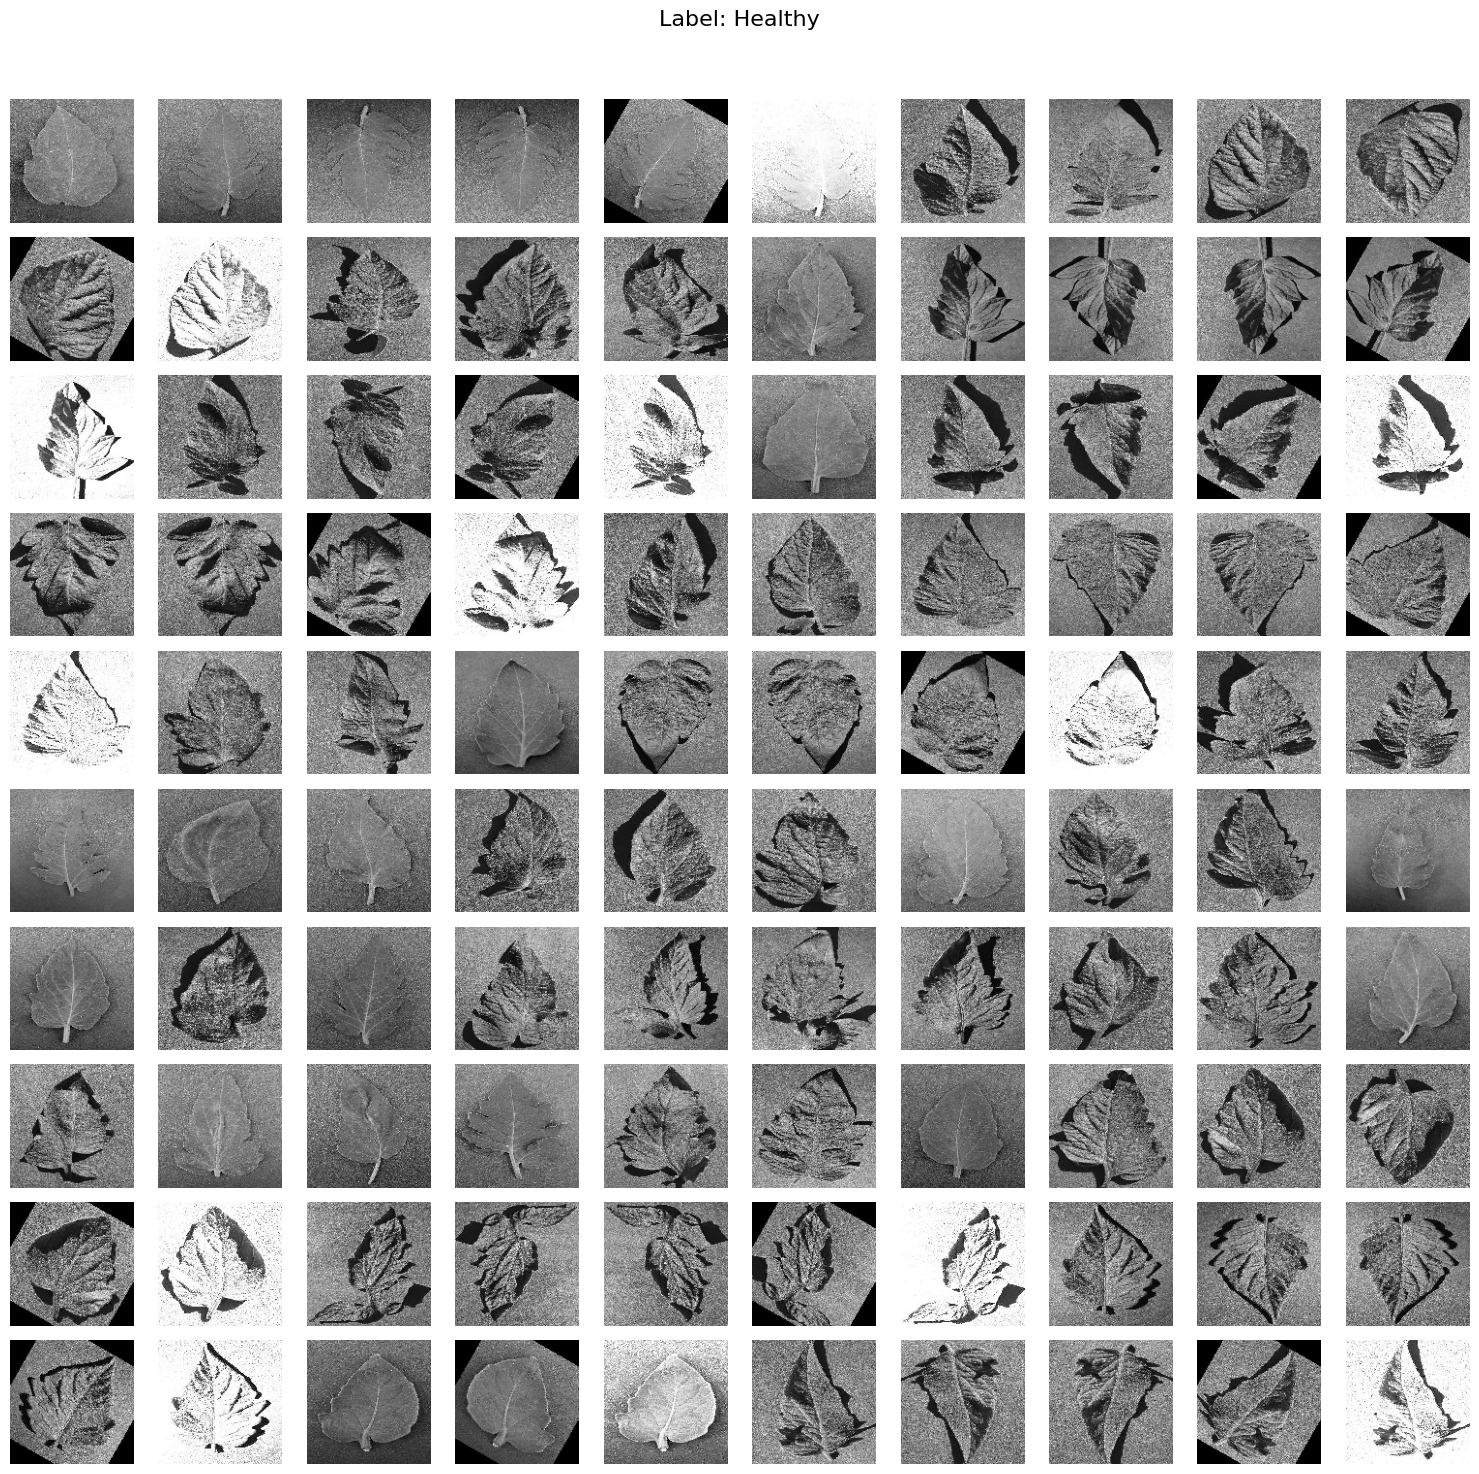

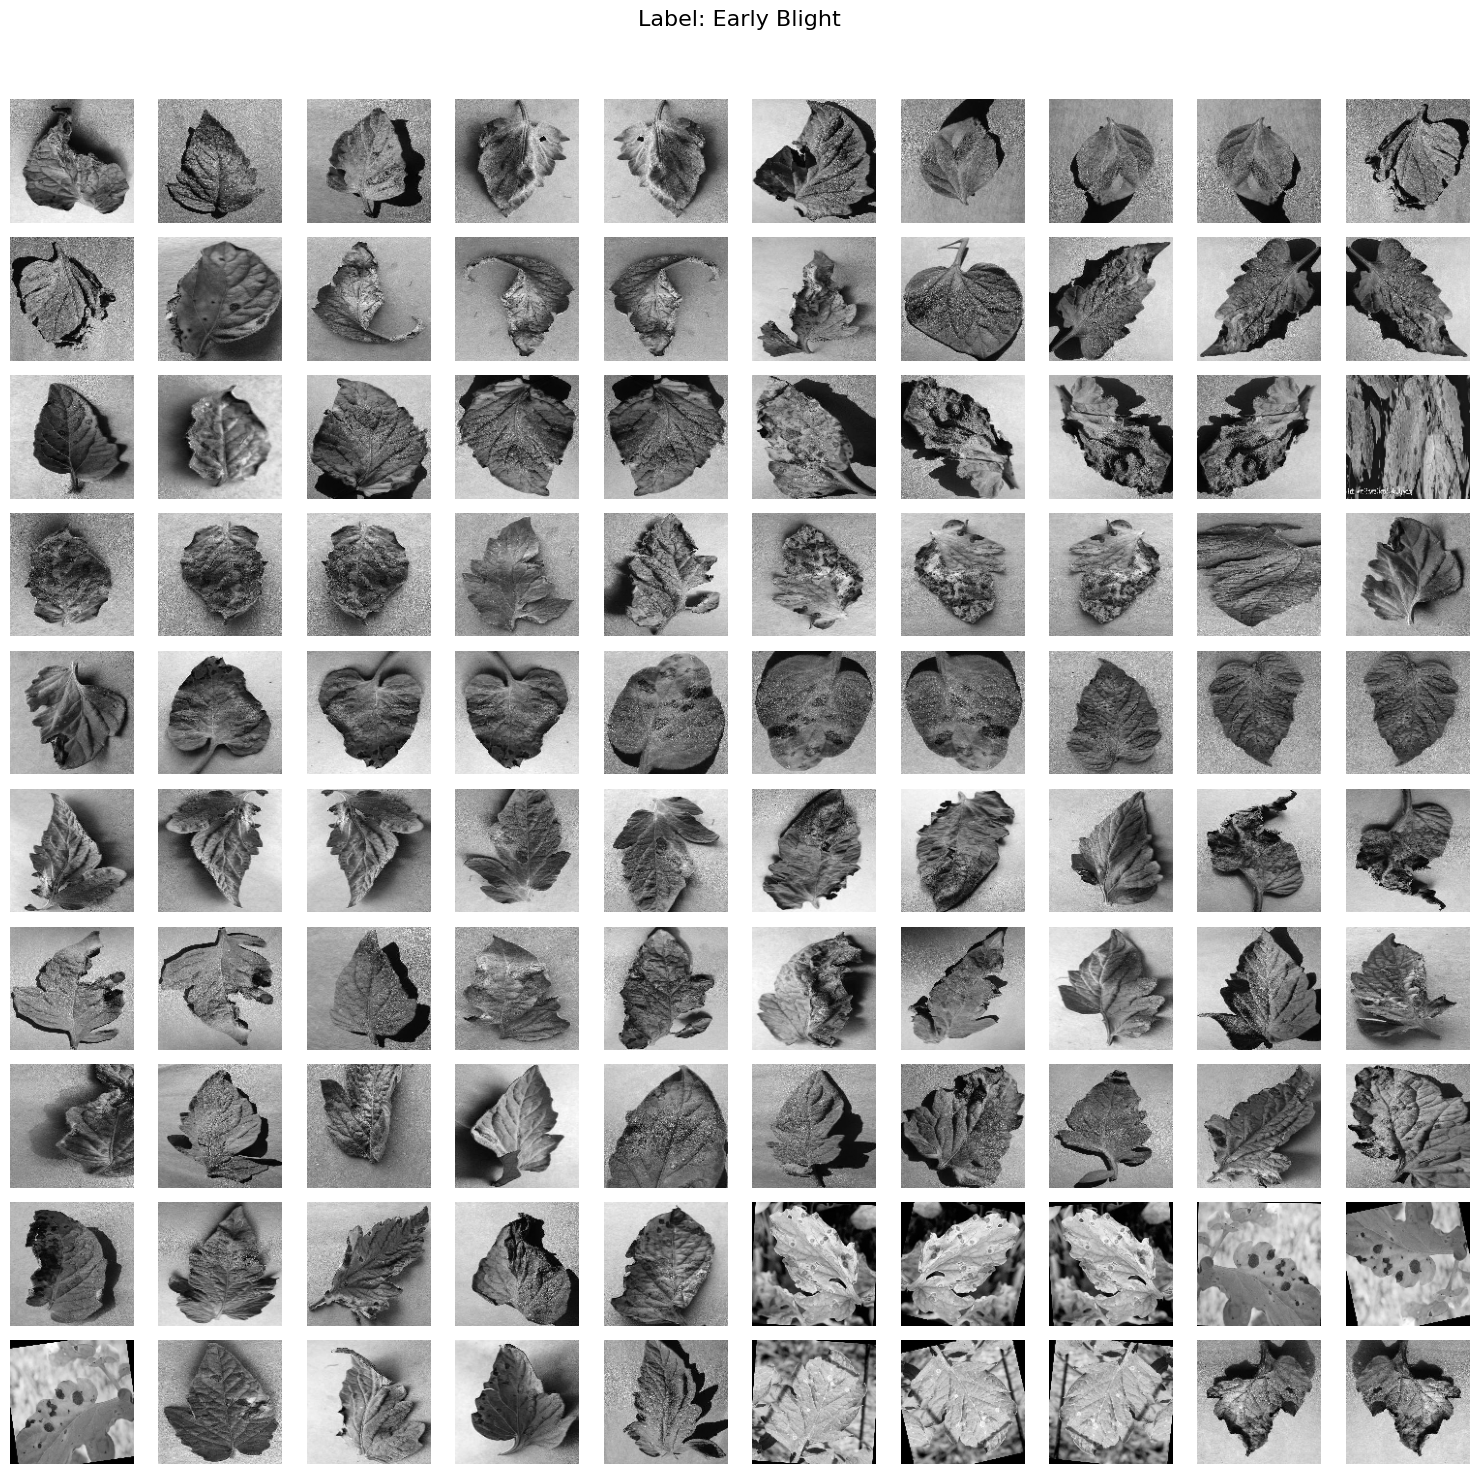

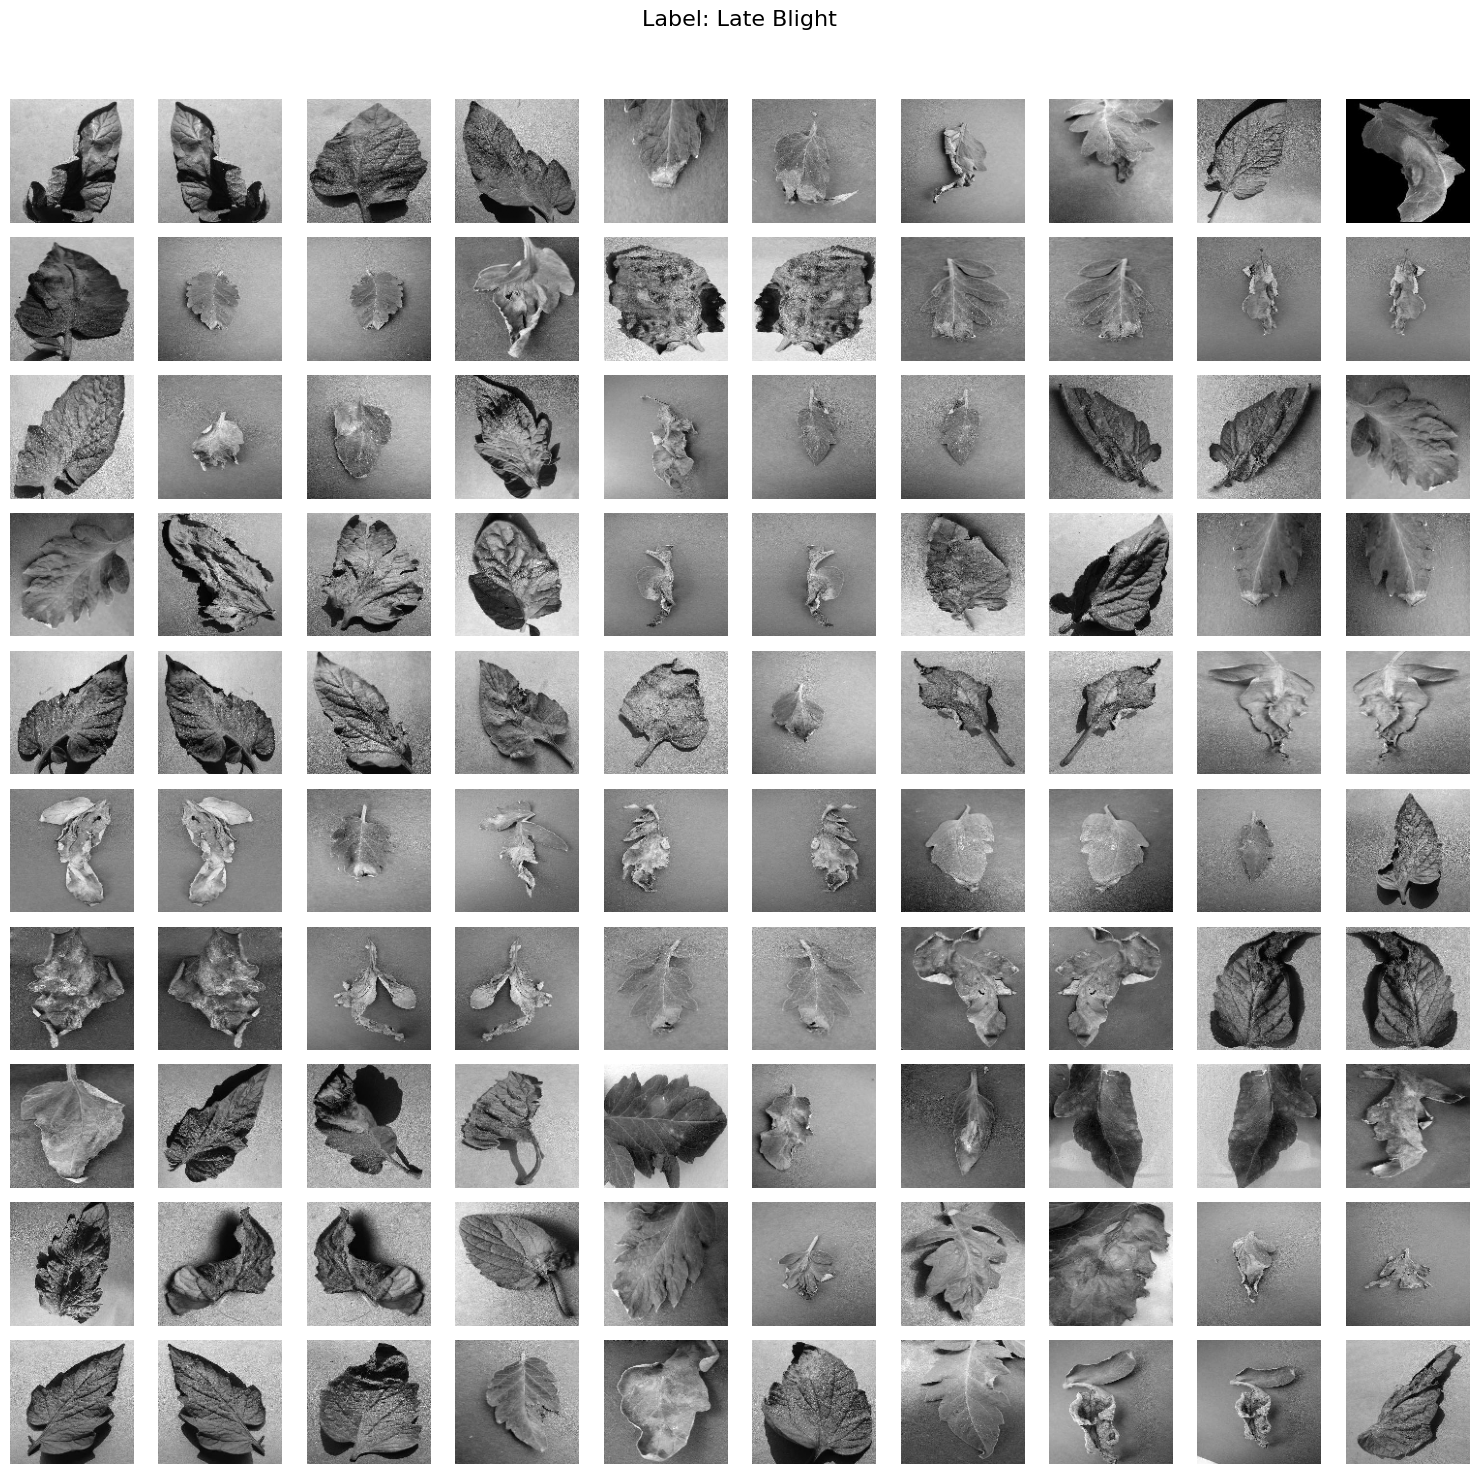

In [9]:
# pada bagian ini bisa gunakan data yang sebelum augmentasi atau setelah augmentasi
dataPreprocessed = [percobaan_1(img, 128, 128) for img in data]
dataPreprocessed = np.array(dataPreprocessed)
labels = np.array(labels)

label_names = {
    "Label 1": "Healthy",
    "Label 2": "Early Blight",
    "Label 3": "Late Blight"
}

# Loop untuk setiap label
for label_code in label_names:
    # Ambil 100 index pertama dengan label ini
    idxs = np.where(labels == label_code)[0][:100]

    # Buat figure
    plt.figure(figsize=(15, 15))
    plt.suptitle(f"Label: {label_names[label_code]}", fontsize=16)

    for i, idx in enumerate(idxs):
        plt.subplot(10, 10, i + 1)
        plt.imshow(dataPreprocessed[idx], cmap='gray')
        plt.axis('off')

    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    plt.show()


### Feature Extraction

In [10]:
def glcm(image, derajat):
    if derajat == 0:
        angles = [0]
    elif derajat == 45:
        angles = [np.pi / 4]
    elif derajat == 90:
        angles = [np.pi / 2]
    elif derajat == 135:
        angles = [3 * np.pi / 4]
    else:
        raise ValueError("Invalid angle. It should be one of the following: 0, 45, 90, 135.")
    
    # mengembalikan matrix glcm dari image
    glcm = graycomatrix(image, [1], angles, 256, symmetric=True, normed=True)
    return glcm

In [ ]:
def correlation(matriks):
	return graycoprops(matriks, 'correlation')[0, 0]

In [12]:
def dissimilarity(matriks):
    return graycoprops(matriks, 'dissimilarity')[0, 0]

In [13]:
def homogenity(matriks):
    return graycoprops(matriks, 'homogeneity')[0, 0]

In [14]:
def contrast(matriks):
    return graycoprops(matriks, 'contrast')[0, 0]

In [15]:
def ASM(matriks):
    return graycoprops(matriks, 'ASM')[0, 0]

In [16]:
def energy(matriks):
    return graycoprops(matriks, 'energy')[0, 0]

In [17]:
def entropyGlcm(matriks):
    return entropy(matriks.ravel())

In [18]:
Derajat0 = []
Derajat45 = []
Derajat90 = []
Derajat135 = []
for i in range(len(dataPreprocessed)):
    D0 = glcm(dataPreprocessed[i], 0)
    D45 = glcm(dataPreprocessed[i], 45)
    D90 = glcm(dataPreprocessed[i], 90)
    D135 = glcm(dataPreprocessed[i], 135)
    Derajat0.append(D0)
    Derajat45.append(D45)
    Derajat90.append(D90)
    Derajat135.append(D135)

In [19]:
Kontras0, Kontras45, Kontras90, Kontras135 = [], [], [], []
dissimilarity0, dissimilarity45, dissimilarity90, dissimilarity135 =  [], [], [], []
homogenity0, homogenity45, homogenity90, homogenity135 = [], [], [], []
entropy0, entropy45, entropy90, entropy135 =  [], [], [], []
ASM0, ASM45, ASM90, ASM135 =  [], [], [], []
energy0, energy45, energy90, energy135 =  [], [], [], []
correlation0, correlation45, correlation90, correlation135 = [], [], [], []


In [20]:
for i in range(len(dataPreprocessed)):
    C0 = correlation(Derajat0[i])
    correlation0.append(C0)
    C45 = correlation(Derajat45[i])
    correlation45.append(C45)
    C90 = correlation(Derajat90[i])
    correlation90.append(C90)
    C135 = correlation(Derajat135[i])
    correlation135.append(C135)

In [21]:
for i in range(len(data)):
    K0 = contrast(Derajat0[i])
    K45 = contrast(Derajat45[i])
    K90 = contrast(Derajat90[i])
    K135 = contrast(Derajat135[i])
    Kontras0.append(K0)
    Kontras45.append(K45)
    Kontras90.append(K90)
    Kontras135.append(K135)

In [22]:
for i in range(len(data)):
    Dis0 = dissimilarity(Derajat0[i])
    Dis45 = dissimilarity(Derajat45[i])
    Dis90 = dissimilarity(Derajat90[i])
    Dis135 = dissimilarity(Derajat135[i])
    dissimilarity0.append(Dis0)
    dissimilarity45.append(Dis45)
    dissimilarity90.append(Dis90)
    dissimilarity135.append(Dis135)

In [23]:
for i in range(len(data)):
    H0 = homogenity(Derajat0[i])
    H45 = homogenity(Derajat45[i])
    H90 = homogenity(Derajat90[i])
    H135 = homogenity(Derajat135[i])
    homogenity0.append(H0)
    homogenity45.append(H45)
    homogenity90.append(H90)
    homogenity135.append(H135)

In [24]:
for i in range(len(data)):  
    E0 = entropyGlcm(Derajat0[i])
    E45 = entropyGlcm(Derajat45[i])
    E90 = entropyGlcm(Derajat90[i])
    E135 = entropyGlcm(Derajat135[i])
    entropy0.append(E0)
    entropy45.append(E45)
    entropy90.append(E90)
    entropy135.append(E135)

In [25]:
for i in range(len(data)):
    A0 = ASM(Derajat0[i])
    A45 = ASM(Derajat45[i])
    A90 = ASM(Derajat90[i])
    A135 = ASM(Derajat135[i])
    ASM0.append(A0)
    ASM45.append(A45)
    ASM90.append(A90)
    ASM135.append(A135)

In [26]:
for i in range(len(data)):
    ER0 = energy(Derajat0[i])
    ER45 = energy(Derajat45[i])
    ER90 = energy(Derajat90[i])
    ER135 = energy(Derajat135[i])
    energy0.append(ER0)
    energy45.append(ER45)
    energy90.append(ER90)
    energy135.append(ER135)

In [ ]:
# Gabungkan semua fitur dari setiap citra ke dalam satu array fitur per gambar
features = []

for i in range(len(dataPreprocessed)):
    fitur = [
        correlation0[i], correlation45[i], correlation90[i], correlation135[i],
        dissimilarity0[i], dissimilarity45[i], dissimilarity90[i], dissimilarity135[i],
        Kontras0[i], Kontras45[i], Kontras90[i], Kontras135[i],
        homogenity0[i], homogenity45[i], homogenity90[i], homogenity135[i],
        entropy0[i], entropy45[i], entropy90[i], entropy135[i],
        ASM0[i], ASM45[i], ASM90[i], ASM135[i],
        energy0[i], energy45[i], energy90[i], energy135[i],
    ]
    features.append(fitur)

# Ubah menjadi numpy array agar bisa digunakan di ML model
features = np.array(features)
labels = np.array(labels)


### Write the extraction's results to CSV 

In [30]:
dataTable = {'Filename': file_name, 'Label': labels,
        'Contrast0': Kontras0, 'Contrast45': Kontras45, 'Contrast90': Kontras90, 'Contrast135': Kontras135,
        'Homogeneity0': homogenity0, 'Homogeneity45': homogenity45, 'Homogeneity90': homogenity90, 'Homogeneity135': homogenity135,
        'Dissimilarity0': dissimilarity0, 'Dissimilarity45': dissimilarity45, 'Dissimilarity90': dissimilarity90, 'Dissimilarity135': dissimilarity135,
        'Entropy0': entropy0, 'Entropy45': entropy45, 'Entropy90': entropy90, 'Entropy135': entropy135,
        'ASM0': ASM0, 'ASM45': ASM45, 'ASM90': ASM90, 'ASM135': ASM135,
        'Energy0': energy0, 'Energy45': energy45, 'Energy90': energy90, 'Energy135': energy135,
        'Correlation0': correlation0, 'Correlation45': correlation45, 'Correlation90': correlation90, 'Correlation135': correlation135,
        }
df = pd.DataFrame(dataTable)
df.to_csv('hasil_ekstraksi_1.csv', index=False)

hasilEkstrak = pd.read_csv('hasil_ekstraksi_1.csv')
hasilEkstrak


Filename    Label   Contrast0  \
0    000146ff-92a4-4db6-90ad-8fce2ae4fddd___GH_HL L...  Label 1  354.122109   
1    000bf685-b305-408b-91f4-37030f8e62db___GH_HL L...  Label 1  607.447712   
2    000bf685-b305-408b-91f4-37030f8e62db___GH_HL L...  Label 1  606.262672   
3    000bf685-b305-408b-91f4-37030f8e62db___GH_HL L...  Label 1  605.435101   
4    000bf685-b305-408b-91f4-37030f8e62db___GH_HL L...  Label 1  665.282480   
..                                                 ...      ...         ...   
295  0931f7e6-8481-4d03-8fe6-d4ae7637142d___RS_Late...  Label 3  742.508981   
296  09590524-981f-4dc5-b6e3-5225a0c48019___GHLB2ES...  Label 3  180.183132   
297  098502fa-e07f-4d89-8279-adf307800887___GHLB2 L...  Label 3  238.343750   
298  098f19fb-1064-4c96-9498-70adcd29f5ae___GHLB2 L...  Label 3  214.061393   
299  0990b491-dd31-4b62-aa5a-c7bce97d552c___RS_Late...  Label 3  416.686331   

     Contrast45  Contrast90  Contrast135  Homogeneity0  Homogeneity45  \
0    359.089094  352.764456   364.102610      0.079469       0.075690   
1    620.988468  600.678519   607.108996      0.061397       0.061609   
2    618.184016  599.695559   613.619443      0.062447       0.061669   
3    604.858268  593.408588   615.947796      0.062129       0.059421   
4    716.358113  666.254060   709.112158      0.182329       0.177109   
..          ...         ...          ...           ...            ...   
295  883.538967  774.786171   881.435179      0.109826       0.096716   
296  259.463885  252.064899   297.278753      0.132321       0.112198   
297  349.590923  281.724902   330.942278      0.194363       0.160207   
298  288.667989  253.259350   292.640461      0.217885       0.179085   
299  658.797756  470.929626   420.220100      0.133862       0.112518   

     Homogeneity90  Homogeneity135  ...     ASM90    ASM135   Energy0  \
0         0.078292        0.079089  ...  0.000324  0.000319  0.017985   
1         0.059937        0.059713  ...  0.000190  0.000189  0.013783   
2         0.063700        0.060738  ...  0.000194  0.000191  0.013903   
3         0.061679        0.061813  ...  0.000196  0.000194  0.013965   
4         0.181121        0.176854  ...  0.016052  0.014918  0.126209   
..             ...             ...  ...       ...       ...       ...   
295       0.102638        0.094826  ...  0.000193  0.000177  0.014575   
296       0.115432        0.111506  ...  0.000275  0.000266  0.017459   
297       0.169436        0.159820  ...  0.000447  0.000430  0.022745   
298       0.193289        0.179487  ...  0.000618  0.000584  0.026390   
299       0.120315        0.117326  ...  0.000309  0.000302  0.018388   

     Energy45  Energy90  Energy135  Correlation0  Correlation45  \
0    0.017857  0.017989   0.017864      0.625892       0.619058   
1    0.013787  0.013798   0.013736      0.603738       0.590942   
2    0.013858  0.013926   0.013812      0.606725       0.594920   
3    0.013875  0.013991   0.013928      0.602860       0.598811   
4    0.122567  0.126696   0.122140      0.849417       0.835832   
..        ...       ...        ...           ...            ...   
295  0.013264  0.013908   0.013306      0.868549       0.842582   
296  0.016452  0.016592   0.016309      0.946349       0.922660   
297  0.020654  0.021146   0.020733      0.869521       0.809413   
298  0.024260  0.024850   0.024176      0.849931       0.796061   
299  0.017150  0.017568   0.017369      0.889533       0.825860   

     Correlation90  Correlation135  
0         0.625944        0.613765  
1         0.604402        0.600141  
2         0.607069        0.597852  
3         0.606765        0.591447  
4         0.849227        0.837493  
..             ...             ...  
295       0.861835        0.842958  
296       0.924923        0.911391  
297       0.846014        0.819567  
298       0.821399        0.793333  
299       0.874935        0.888924  

[300 rows x 30 columns]

### Features Selection

pada bagian seleksi fitur ini bisa menggunakan metode seperti
- PCA
- LDA
- t-SNE
- Chi-square
- ANOVA
- Autoencoder
- correlation
- dll

berikut contoh menggunakan correlation:

<Axes: >

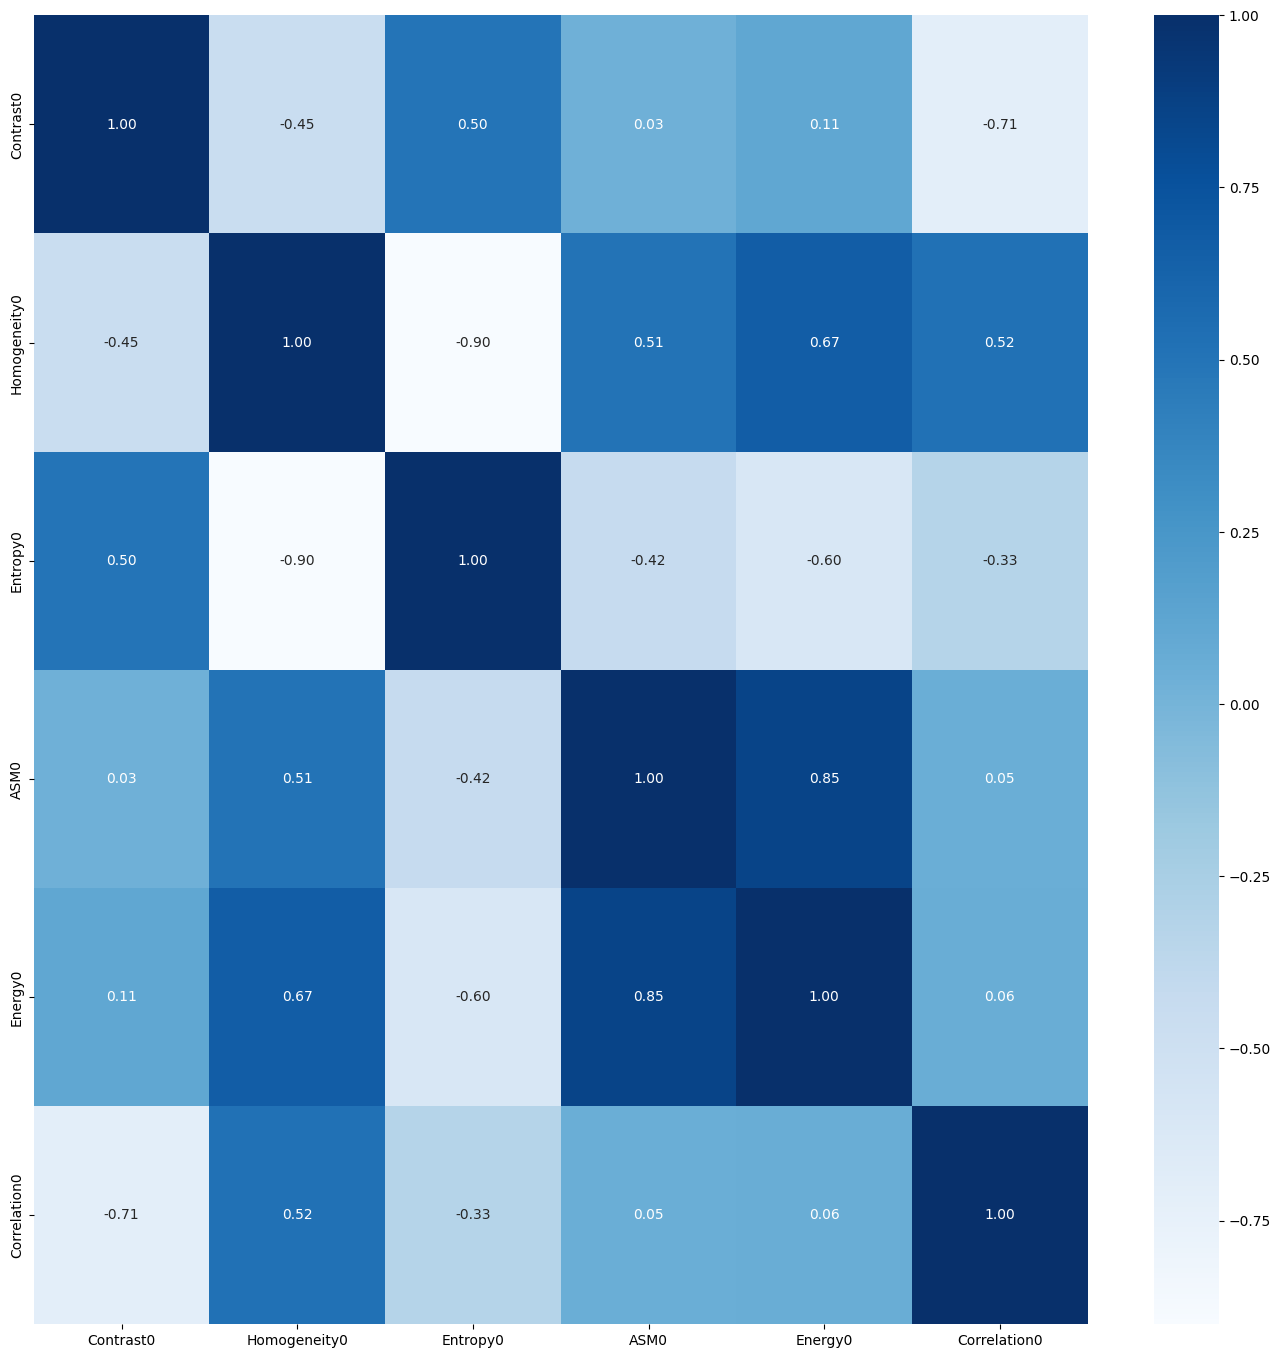

In [31]:
# Menghitung korelasi
correlation = hasilEkstrak.drop(columns=['Label','Filename']).corr()

# Menyaring fitur yang memiliki korelasi absolut lebih dari 0.95 dengan label
threshold = 0.95 # atur threshold ini untuk menentukan seberapa besar korelasi yang ingin disaring
selectionFeature = []
columns = np.full((correlation.shape[0],), True, dtype=bool)
for i in range(correlation.shape[0]):
	for j in range(i+1, correlation.shape[0]):
		if correlation.iloc[i,j] >= threshold:
			if columns[j]:
				columns[j] = False
select = hasilEkstrak.drop(columns=['Label','Filename']).columns[columns]
x_new = hasilEkstrak[select]
x_new
y = hasilEkstrak['Label']
plt.figure(figsize=(17,17))
sns.heatmap(x_new.corr(), annot=True, cmap='Blues', fmt=".2f")

#### Method ANOVA

<Axes: >

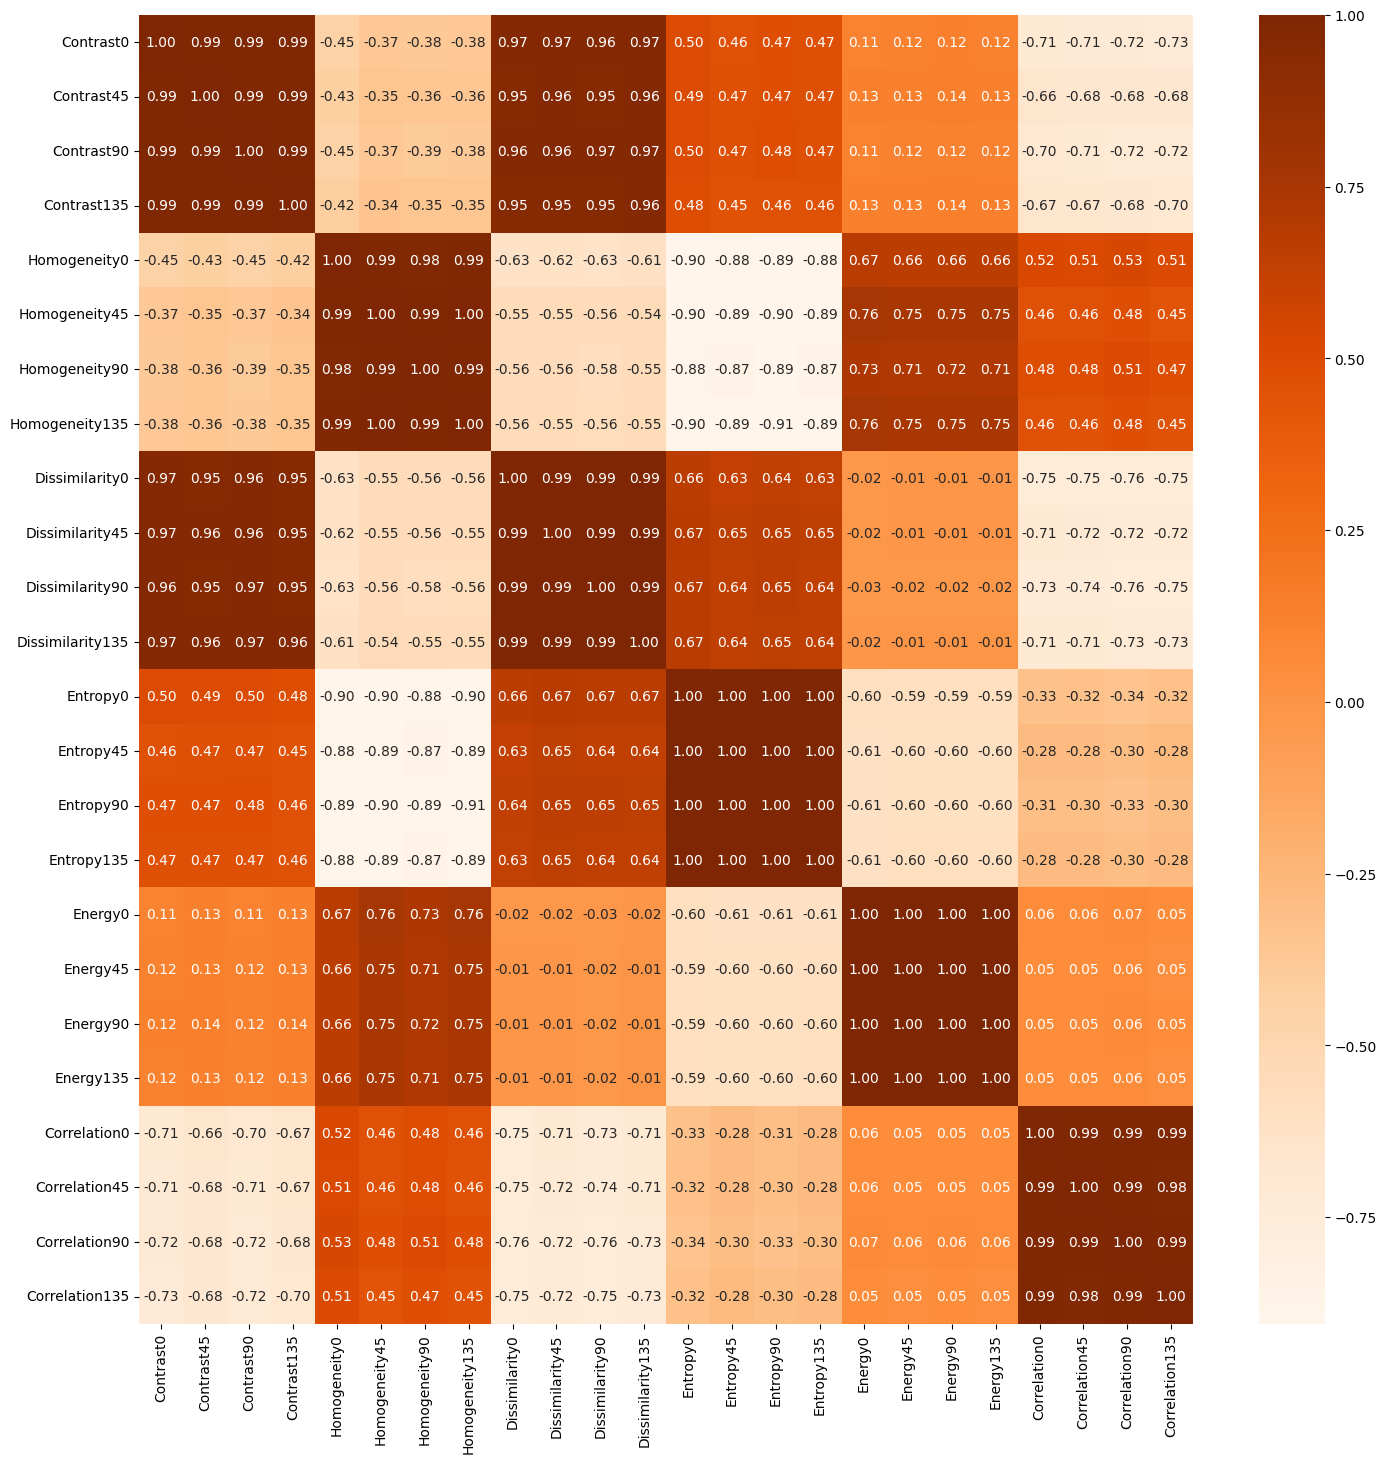

In [34]:
X = hasilEkstrak.drop(columns=['Label', 'Filename'])
y = hasilEkstrak['Label']

# Hitung nilai ANOVA F-score untuk setiap fitur
anova_selector = SelectKBest(score_func=f_classif, k='all')  # 'all' agar kita dapat semua skor
anova_selector.fit(X, y)

# Ambil skor dan nama fitur
anova_scores = anova_selector.scores_
feature_names = X.columns

# Threshold manual (contoh: hanya ambil fitur dengan skor > 5)
threshold = 5
selected_features = feature_names[anova_scores > threshold]

# Tampilkan fitur yang lolos seleksi
x_new = X[selected_features]
x_new

plt.figure(figsize=(17,17))
sns.heatmap(x_new.corr(), annot=True, cmap='Oranges', fmt=".2f")


## Splitting Data

In [36]:
# Memisahkan data menjadi data latih dan data uji
# test_size=0.2 artinya 20% data untuk pengujian, 80% untuk pelatihan
# random_state untuk memastikan hasil konsisten setiap kali dijalankan
# stratify=y memastikan distribusi label tetap seimbang antara train dan test
X_train, X_test, y_train, y_test = train_test_split(
    x_new, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y
)


print("Data Latih:", X_train.shape)
print("Data Uji:", X_test.shape)


Data Latih: (240, 24)
Data Uji: (60, 24)


## Feature Normalization

berikut metode normalisasi yang bisa digunakan:
- Min-Max Scaling
- Standardization (Z-score)
- Robust Scaling
- MaxAbsScaler
- dll

berikut contoh menggunakan Standardization (Z-score):

In [37]:
# normalisasi mean std
X_test = (X_test - X_train.mean()) / X_train.std()
X_train = (X_train - X_train.mean()) / X_train.std()

### Min-Max Scaling

In [40]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modeling

### Define Model

In [41]:
def generateClassificationReport(y_true, y_pred):
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    
    print("Accuracy:", accuracy_score(y_true, y_pred))

# Define classifiers
rf = RandomForestClassifier(n_estimators=5, random_state=42)
svm = SVC(kernel='rbf', random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

### Train Random Forest Classifier

In [42]:
# Train Random Forest Classifier
rf.fit(X_train, y_train)

# Make predictions and evaluate the model with the training set
print("------Training Set------")
y_pred_train = rf.predict(X_train)
generateClassificationReport( y_train, y_pred_train)

# Make predictions and evaluate the model with the testing set
print("\n------Testing Set------")
y_pred_test = rf.predict(X_test)
generateClassificationReport( y_test, y_pred_test)

------Training Set------
Classification Report:
              precision    recall  f1-score   support

     Label 1       1.00      0.99      0.99        80
     Label 2       0.99      0.99      0.99        80
     Label 3       0.98      0.99      0.98        80

    accuracy                           0.99       240
   macro avg       0.99      0.99      0.99       240
weighted avg       0.99      0.99      0.99       240

Confusion Matrix:
[[79  0  1]
 [ 0 79  1]
 [ 0  1 79]]
Accuracy: 0.9875

------Testing Set------
Classification Report:
              precision    recall  f1-score   support

     Label 1       1.00      1.00      1.00        20
     Label 2       0.62      0.65      0.63        20
     Label 3       0.63      0.60      0.62        20

    accuracy                           0.75        60
   macro avg       0.75      0.75      0.75        60
weighted avg       0.75      0.75      0.75        60

Confusion Matrix:
[[20  0  0]
 [ 0 13  7]
 [ 0  8 12]]
Accuracy: 0.75


### Train SVM Classifier

In [43]:
# Train SVM Classifier
svm.fit(X_train, y_train)

# Make predictions and evaluate the model with the training set
print("\n------Training Set------")
y_pred_train = svm.predict(X_train)
generateClassificationReport( y_train, y_pred_train)

# Make predictions and evaluate the model with the testing set
print("\n------Testing Set------")
y_pred_test = svm.predict(X_test)
generateClassificationReport( y_test, y_pred_test)


------Training Set------
Classification Report:
              precision    recall  f1-score   support

     Label 1       0.96      0.88      0.92        80
     Label 2       0.68      0.97      0.80        80
     Label 3       0.85      0.56      0.68        80

    accuracy                           0.80       240
   macro avg       0.83      0.80      0.80       240
weighted avg       0.83      0.80      0.80       240

Confusion Matrix:
[[70  2  8]
 [ 2 78  0]
 [ 1 34 45]]
Accuracy: 0.8041666666666667

------Testing Set------
Classification Report:
              precision    recall  f1-score   support

     Label 1       1.00      0.90      0.95        20
     Label 2       0.58      0.90      0.71        20
     Label 3       0.64      0.35      0.45        20

    accuracy                           0.72        60
   macro avg       0.74      0.72      0.70        60
weighted avg       0.74      0.72      0.70        60

Confusion Matrix:
[[18  0  2]
 [ 0 18  2]
 [ 0 13  7]]
Ac

### Train KNN Classifier

In [44]:
# Train KNN Classifier
knn.fit(X_train, y_train)

# Make predictions and evaluate the model with the training set
print("\n------Training Set------")
y_pred_train = knn.predict(X_train)
generateClassificationReport( y_train, y_pred_train)

# Make predictions and evaluate the model with the testing set
print("\n------Testing Set------")
y_pred_test = knn.predict(X_test)
generateClassificationReport( y_test, y_pred_test)



------Training Set------
Classification Report:
              precision    recall  f1-score   support

     Label 1       0.95      0.93      0.94        80
     Label 2       0.83      0.90      0.86        80
     Label 3       0.84      0.79      0.81        80

    accuracy                           0.87       240
   macro avg       0.87      0.87      0.87       240
weighted avg       0.87      0.87      0.87       240

Confusion Matrix:
[[74  1  5]
 [ 1 72  7]
 [ 3 14 63]]
Accuracy: 0.8708333333333333

------Testing Set------
Classification Report:
              precision    recall  f1-score   support

     Label 1       1.00      1.00      1.00        20
     Label 2       0.67      0.80      0.73        20
     Label 3       0.75      0.60      0.67        20

    accuracy                           0.80        60
   macro avg       0.81      0.80      0.80        60
weighted avg       0.81      0.80      0.80        60

Confusion Matrix:
[[20  0  0]
 [ 0 16  4]
 [ 0  8 12]]
Ac

## Evaluation With Confusion Matrix

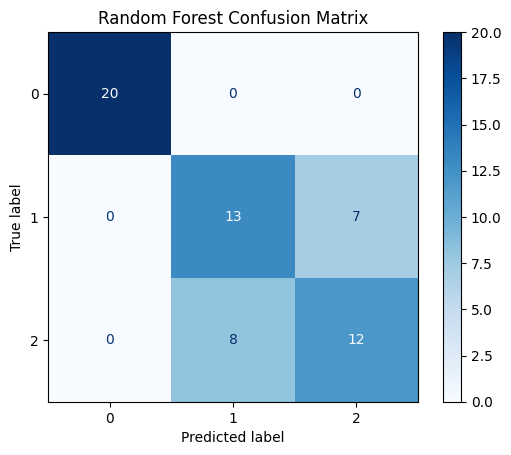

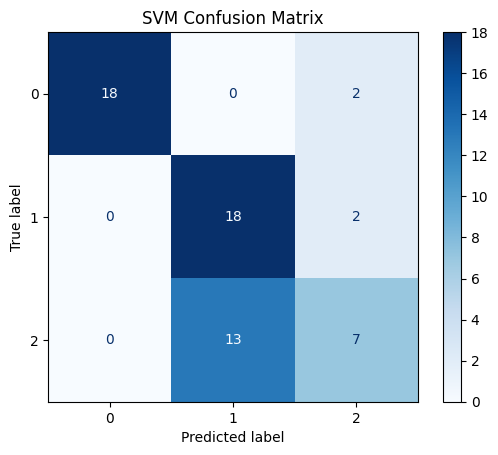

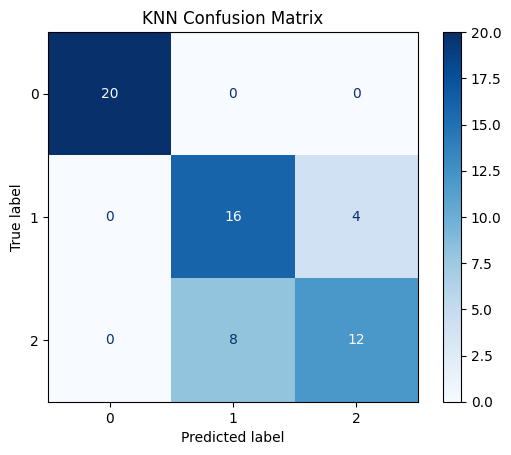

In [45]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# Plot confusion matrix for Random Forest
plot_confusion_matrix(y_test, rf.predict(X_test), "Random Forest Confusion Matrix")
# Plot confusion matrix for SVM
plot_confusion_matrix(y_test, svm.predict(X_test), "SVM Confusion Matrix")
# Plot confusion matrix for KNN
plot_confusion_matrix(y_test, knn.predict(X_test), "KNN Confusion Matrix")